# Проект: Исследование стартапов


- Автор: Набойщикова Анастасия Дмитриевна
- Дата: 16.04.2025

## Введение

### Цели и задачи проекта

Целью настоящего проекта является предоставлнение информации для выхода финансовой компании на инвестиционный рынок для приобретения, развития и последующей продажи перспективных стартапов. Для достижения этой цели планируется проведение всестороннего исследования на основе исторических данных.


### Описание данных

Таблица ___acquisition___ содержит информацию о покупках одними компаниями других компаний:
- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.   

Таблица ___company_and_rounds___ содержит информацию о компаниях и раундах финансирования:
- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.

Таблица ___education___ содержит информацию об образовании сотрудника:
- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.

Таблица ___people___ содержит информацию о сотрудниках:
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.

Таблица ___degrees___ содержит информацию о типе образования сотрудника:
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.




<u>___Дополнительные таблицы:___</u>
    
Таблица ___fund___ cодержит информацию о фондах:
- id — идентификатор фонда.
- name — название фонда.
- category_code — категория области деятельности компании.
- founded_at — дата создания фонда.
- domain — сайт фонда.
- network_username — ник фонда в сети.
- country_code — код страны фонда.
- investment_rounds — число инвестиционных раундов.
- invested_companies — число профинансированных компаний.
- milestones — вехи финансирования.


Таблица ___investment___ содержит информацию о раундах инвестирования:
- id — идентификатор этапа инвестирования.
- funding_round_id — идентификатор раунда инвестирования.
- company_id — индентификатор компании.
- funding_round_type — тип финансирования.
- fund_id — идентификатор фонда.

### Содержимое проекта

- Загрузка и знакомство с данными.
- Предобработка данных.
- Исследовательский анализ данных.
- Итоговый вывод и рекомендации.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
#!pip install missingno
%pip install missingno
import missingno as msno 
from sklearn.preprocessing import OrdinalEncoder 

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчета коэффициента корееляции phi_k
#try:
#    from phik import phik_matrix 
#except:
#    #!pip install phik
#    %pip install phik
#    from phik import phik_matrix 

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Выгружаем данные в переменные
acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

In [3]:
# изучаем информацию датасета acquisition для этого выводим первые 5 строк датасета
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [4]:
# изучаем информацию датасета acquisition для дальнейшего анализа
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [5]:
# изучаем количество пропусков в столбце acquisition
round(acquisition.isna().mean()*100,1)

id                       0.0
acquiring_company_id     0.0
acquired_company_id      0.0
term_code               80.5
price_amount             0.0
acquired_at              0.3
dtype: float64

В датасете ___acquisition___ содержится 6 столбцов и 9407 строк, обьем занимаемой памяти составляет примерно 441.1 КБ., названия столбцов в подходящем стиле snake_case.

Есть большое количество пропусков в столбце term_code (80.5%) и немного пропусков в столбце acquired_at (0.3%)

В датасете содеражтся данные двух типов: object и int64.

В столбце term_code оставим пропуски так как их заполнение может привести к искажению данных для исследования.

Столбец acquired_at лучше перевести из object в datetime64 (значение даты).

In [6]:
# изучаем информацию датасета company_and_rounds для этого выводим первые 5 строк датасета
company_and_rounds.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# изучаем информацию датасета company_and_rounds для дальнейшего анализа
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [8]:
# изучаем количество пропусков в столбце company_and_rounds
round(company_and_rounds.isna().mean()*100,1)

company  ID               0.1
name                      0.1
category  code           33.9
status                    0.1
founded  at              49.5
closed  at               98.4
domain                   32.4
network  username        56.1
country  code            50.1
investment  rounds        0.1
funding  rounds           0.1
funding  total            0.1
milestones                0.1
funding  round  id       75.7
company  id              75.7
funded  at               75.8
funding  round  type     75.7
raised  amount           75.7
pre  money  valuation    75.7
participants             75.7
is  first  round         75.7
is  last  round          75.7
dtype: float64

В датасете ___company_and_rounds___ содержится 22 столбца и 217774 строк, обьем занимаемой памяти составляет примерно 36.6 КБ., 

Названия столбцов нужно привести к подходящему стилю snake_case, но перед этим переименовать один из столбцов company  ID или company  id, так как при приведении к стилю snake_case названия будут дублировать друг-друга.

Во всех столбцах присутствуют пропуски.

В датасете содеражтся данные двух типов: object и float64.
Столбец founded at, funded at  и closed at лучше перевести из object в datetime64 (значение даты).

In [9]:
# переименовываем столбцы company id и company ID для исключения дальнейшего дубляжа названий
company_and_rounds = company_and_rounds.rename(columns={'company  ID': 'company_id'})
company_and_rounds = company_and_rounds.rename(columns={'company  id': 'company_id_round'})
# приводим колонки датафрейма company_and_rounds к принятому snake case
company_and_rounds.columns = company_and_rounds.columns.str.replace('\s+', '_', regex=True).str.lower()

In [10]:
# проверяем как теперь выглядят названия колонок в датафрейме
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id_round     52928 non-null   float64
 15  funded_at        

Приведение названий столбцов датафрейма company_and_rounds к принятым стандартам написания названий работает корректно, названия столбцов теперь отображаются верно

In [11]:
# изучаем информацию датасета education для этого выводим первые 5 строк датасета
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [12]:
# изучаем информацию датасета education для дальнейшего анализа
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [13]:
# изучаем количество пропусков в столбце education
round(education.isna().mean()*100,1)

id               0.0
person_id        0.0
instituition     0.1
graduated_at    47.0
dtype: float64

В датасете ___education___ содержится 4 столбца и 109610 строк, обьем занимаемой памяти составляет примерно 3.3 МБ., названия столбцов соответствуют стилю snake_case.

Большое количество пропусков присутствует в столбце graduated_at (47%) и незначительное колтичество пропусков есть в столбце instituition.

В датасете содеражтся данные двух типов: object и float64.

Столбец graduated_at лучше перевести из object в datetime64 (значение даты).

In [14]:
# изучаем информацию датасета people для этого выводим первые 5 строк датасета
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [15]:
# изучаем информацию датасета people для дальнейшего анализа
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [16]:
# изучаем количество пропусков в столбце people
round(people.isna().mean()*100,1)

id                   0.0
first_name           0.0
last_name            0.0
company_id          84.7
network_username    82.9
dtype: float64

В датасете ___people___ содержится 5 столбцов и 226709 строк, обьем занимаемой памяти составляет примерно 8.6 МБ., названия столбцов соответствуют стилю snake_case.

Большое количество пропусков присутствует в столбцах company_id (84.7%) и network_username (82.9%).

В датасете содеражтся данные двух типов: int64, object и float64.

In [17]:
# изучаем информацию датасета degrees для этого выводим первые 5 строк датасета
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [18]:
# изучаем информацию датасета degrees для дальнейшего анализа
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [19]:
# изучаем количество пропусков в столбце degrees
round(degrees.isna().mean()*100,1)

id              0.0
object_id       0.0
degree_type    10.2
subject        25.8
dtype: float64

В датасете ___degrees___ содержится 4 столбца и 109610 строк, обьем занимаемой памяти составляет примерно 3.3 МБ., названия столбцов соответствуют стилю snake_case.

Пропуски присутствуют в столбцах degree_type (10.2%) и subject (25.8%).

В датасете содеражтся данные двух типов: int64 и object.

In [20]:
# изучаем информацию датасета fund для этого выводим первые 5 строк датасета
fund.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [21]:
# изучаем информацию датасета fund для дальнейшего анализа
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [22]:
# изучаем количество пропусков в столбце fund
round(fund.isna().mean()*100,1)

id                     0.0
name                   0.0
founded_at            60.5
domain                36.8
network_username      81.6
country_code          39.5
investment_rounds      0.0
invested_companies     0.0
milestones             0.0
dtype: float64

В датасете ___fund___ содержится 9 столбцов и 11652 строк, обьем занимаемой памяти составляет примерно 819.4 КБ., названия столбцов соответствуют стилю snake_case.

Пропуски присутствуют в столбцах founded_at (60.5%), domain (36.8%), network_username (81.6%) и country_code (39.5%).

В датасете содеражтся данные двух типов: int64 и object.
Столбец founded_at лучше перевести из object в datetime64 (значение даты).

In [23]:
# изучаем информацию датасета investment для этого выводим первые 5 строк датасета
investment.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [24]:
# изучаем информацию датасета investment для дальнейшего анализа
investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


In [25]:
# изучаем количество пропусков в столбце investment
round(investment.isna().mean()*100,1)

id                  0.0
funding_round_id    0.0
company_id          0.0
fund_id             0.0
dtype: float64

В датасете ___investment___ содержится 4 столбца и 61403 строк, обьем занимаемой памяти составляет примерно 1.9 МБ., названия столбцов соответствуют стилю snake_case.

Пропуски в данных отсутствуют.

В датасете содеражтся данные типы int64.

#### <u>Вывод после просмотра общей информации предоставленных данных и исправления названия столбцов:<u>
- были выявлены столбцы с неверными типами данных (данные о дате), которые в дальнейшем будут приводится к данным типа datetime64;
- выявлено большое количество пропусков в данных во всех датасетах кроме investment;
- были выявлены несоотвествия названия столбцов в датафрейме company_and_rounds и приведены к общепринятым нормам.

### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [26]:
# Приводим столбцы содержащие даты к типу datetime
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'])

company_and_rounds['founded_at'] = pd.to_datetime(company_and_rounds['founded_at'])
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'])
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'])

education['graduated_at'] = pd.to_datetime(education['graduated_at'])

fund['founded_at'] = pd.to_datetime(fund['founded_at'])

In [28]:
# проверим изменения типа данных 
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [29]:
# проверим изменения типа данных 
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [30]:
# проверим изменения типа данных 
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


#### <u>Вывод после смены типа данных и анализа пропусков:<u>
    
- все столбцы с датами успешно переведены в тип datetime64;
- При более внимательном изучении пропусков в датафреймах был сделан вывод, что пропущенных значений в датафреймах либо слишком много, либо незначительно мало:
    - Например, в датафрейме ___acquisition___ в столбце term_code пропущено 80.5% значений, а в столбце acquired_at всего 0.3%.
    - В датафрейме ___company_and_rounds___ в столбцах funding_round_id, company_id, funded_at, funding_round_type, raised_amount, pre_money_valuation, participants,is_first_round, is_last_round и closed_at пропущено более 75% данных, в столбцах category_code, founded_at, domain, network_username, country_code пропущено от 33% до 56% даных, а в столбцах name, status, investment_rounds, funding_rounds, funding_total, milestones пропущено всего 0.1%.
    - В датафрейме ___education___ в столбце graduated_at пропущено 47.0% данных, а в столбце instituition всего 0.1%.
    - В датафрейме ___people___ в столбцах company_id и network_username пропцщено 84.7% и 82.9% данных.
    - В датафрейме ___degrees___ в столбцах degree_type и subject пропцщено 10.2% и 25.8%.
    - В датафрейме ___fund___  в столбцах founded_at, domain, network_username и country_code пропцщено от 36% до 81% данных.
    
Таким образом, на основании проведенного анализа пропусков в данных видно что многие столбцы содержат значительное количество отсутствующих значений, что может негативно сказаться на точности и надежности последующих анализов. Учитывая специфику данных и задачи проекта, было принято решение не заполнять пропуски, поскольку это может привести к искусственному искажению информации и снижению достоверности результатов.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [31]:
# Добавляем новый столбец с годомами
company_and_rounds['year'] = company_and_rounds['funded_at'].dt.year

# Группируем данные по годам и рассчитываем типичный размер средств (медиана) и общее количество раундов
grouped_data = company_and_rounds.groupby('year')['raised_amount'].agg(['median', 'count']).reset_index()

# Фильтруем данные, оставляя только те годы, для которых есть информация о более чем 50 раундах финансирования
filtered_data = grouped_data[grouped_data['count'] > 50]
# Выводим таблицу
filtered_data

,year,median,count
15,1999.0,2000000.0,76
16,2000.0,4200000.0,125
17,2001.0,3000000.0,96
18,2002.0,4200000.0,116
19,2003.0,3000000.0,159
20,2004.0,5000000.0,291
21,2005.0,5500000.0,1633
22,2006.0,5000000.0,2436
23,2007.0,3973320.0,3279
24,2008.0,3110000.0,3774


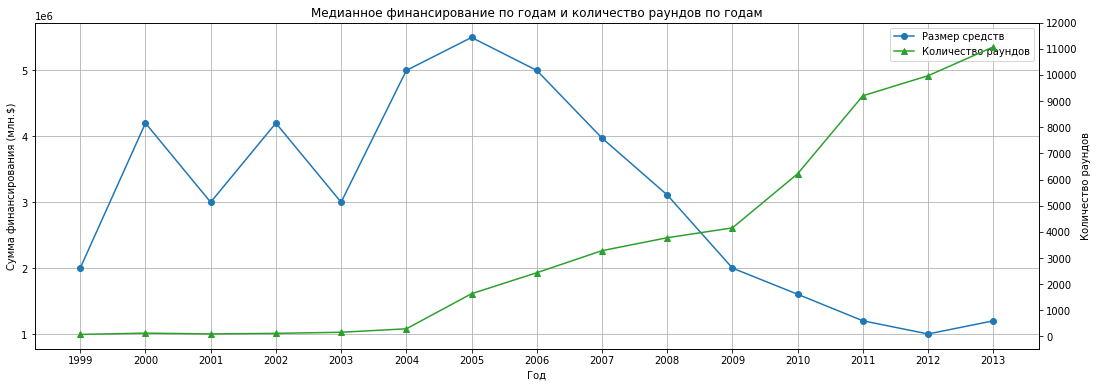

In [32]:
# Построение графика с двумя осями
fig, ax1 = plt.subplots(figsize=(18, 6))

# Первый график: Медианное финансирование
ax1.plot(filtered_data['year'], filtered_data['median'], marker='o', label='Размер средств')
ax1.set_xlabel('Год')
ax1.set_ylabel('Сумма финансирования (млн.$)')
ax1.tick_params(axis='y')
ax1.grid(True)

# Второй график: Количество раундов
ax2 = ax1.twinx()  # Создаем вторую ось
ax2.plot(filtered_data['year'], filtered_data['count'], marker='^', color='tab:green', label='Количество раундов')
ax2.set_ylabel('Количество раундов')
ax2.tick_params(axis='y')


# Добавление делений по оси X и Y для второго графика
years = filtered_data['year'].unique()
ax2.set_xticks(years)  # Деления по оси X
ax2.set_yticks(range(0, max(filtered_data['count']) + 1001, 1000)) 

# Добавляем легенду
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

# Настраиваем заголовок
plt.title('Медианное финансирование по годам и количество раундов по годам')

# Показываем график
plt.show()

#### <u>На основании представленных данных, ответим на интересующие нас вопросы.</u>

- Максимальное значение медианы собранных средств наблюдается в 2005 году, которое составляет 5500000 долларов.
- Количество раундов финансирования составило 11072.
- Типичный размер средств, собранных в рамках одного раунда, составил 1200000 долларов.

Тенденция по сравнению с предыдущими годами:

- По сравнению с 2012 годом, количество раундов увеличилось примерно на 11% (с 9970 до 11072).
- Размер средств, собираемых в рамках одного раунда, увеличился на 20% (с 1000000 долларов до 1200000 долларов).

Таким образом, в 2013 году наблюдался небольшой рост как по количеству раундов, так и по размеру средств, выделяемых в рамках одного раунда.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [33]:
# Подсчитаем количество сотрудников в каждой компании
company_employees = people.groupby('company_id')['id'].nunique()

# Подсчитаем количествао компаний с определенным количеством сотрудников
company_employee_counts = company_employees.value_counts()
company_employee_counts

1      18117
2       2709
3        921
4        450
5        237
6        138
7        100
8         59
9         46
11        30
10        25
13        17
12        16
14         8
17         5
16         4
23         3
15         3
20         3
18         3
19         3
21         2
22         2
56         2
25         2
29         2
35         1
47         1
31         1
48         1
61         1
51         1
138        1
26         1
244        1
72         1
36         1
39         1
32         1
150        1
63         1
Name: id, dtype: int64

Из данных видно, что стартапы в принципе это обычно совсем небольшие компании.
В наибольшем количестве стартапов работает 1 человек, далее количество компаний с сотрудниками от 2 человек резко  снижается более чем в 6.5 раз. Начиная с 8 человек в компании падает более чем в полтора раза по сравнению с 7 и дальше все меньше компаний имеют большее количество сотрудников.


In [34]:
# Преобразование типов данных перед объединением
people['id'] = people['id'].astype(str)
education['person_id'] = education['person_id'].astype(str)
degrees['object_id'] = degrees['object_id'].astype(str)

# Объединение данных по person_id
merged_data = pd.merge(people, education, left_on='id', right_on='person_id', how='left')

# Объединение с таблицей degrees.csv по object_id, который соответствует person_id
merged_data = pd.merge(merged_data, degrees, left_on='person_id', right_on='object_id', how='left')

# Подсчет количества сотрудников в каждой компании
company_sizes = merged_data.groupby('company_id')['person_id'].nunique()

# Разделение компаний на группы по количеству сотрудников
small_companies = company_sizes[company_sizes == 1]
medium_companies = company_sizes[(company_sizes >= 2) & (company_sizes <= 7)]
large_companies = company_sizes[company_sizes > 7]

# Рассчитаем средние доли сотрудников без информации об образовании
def calculate_missing_education_ratio(group):
    group_size = len(group)
    missing_education = group['graduated_at'].isna().sum()
    return missing_education / group_size

small_ratio = merged_data[merged_data['company_id'].isin(small_companies.index)].groupby('company_id').apply(calculate_missing_education_ratio).mean()
medium_ratio = merged_data[merged_data['company_id'].isin(medium_companies.index)].groupby('company_id').apply(calculate_missing_education_ratio).mean()
large_ratio = merged_data[merged_data['company_id'].isin(large_companies.index)].groupby('company_id').apply(calculate_missing_education_ratio).mean()

# Выведем результаты
print(f"Средняя доля сотрудников без информации об образовании:")
print(f"- Маленькие компании: {small_ratio:.2f}")
print(f"- Средние компании: {medium_ratio:.2f}")
print(f"- Большие компании: {large_ratio:.2f}")

Средняя доля сотрудников без информации об образовании:
- Маленькие компании: 0.26
- Средние компании: 0.38
- Большие компании: 0.50


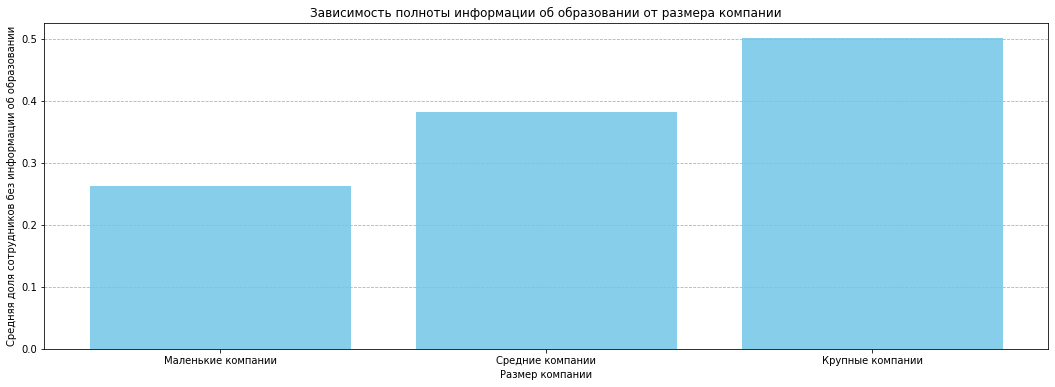

In [35]:
# Данные для графика
company_groups = ['Маленькие компании', 'Средние компании', 'Крупные компании']
missing_education_ratios = [small_ratio, medium_ratio, large_ratio]

# Построение графика
plt.figure(figsize=(18, 6))
plt.bar(company_groups, missing_education_ratios, color='skyblue')
plt.xlabel('Размер компании')
plt.ylabel('Средняя доля сотрудников без информации об образовании')
plt.title('Зависимость полноты информации об образовании от размера компании')
plt.grid(axis='y', linestyle='--')
plt.show()


На данном этапе рабоыт с данными для выполнения задания по оценке полноты информации об образовании сотрудников в зависимости от размера компании,  таблица ___degrees.csv не требуется, но в будущем для заказчика они могут быть полезны, поэтому присоединим таблицу___.

Таблица ___degrees.csv___ содержит информацию о типе образования, но для оценки полноты данных об образовании достаточно использовать таблицы ___people.csv___ и ___education.csv___. В этих таблицах уже есть основная информация, необходимая для анализа:
- ___people.csv___ — содержит идентификационную информацию о сотрудниках и их принадлежности к компаниям.
- ___education.csv___ — содержит информацию об образовании сотрудников.

Объединили по столбцу ___object_id___ — идентификатор сотрудника датасет ___degrees___.
Для этого пришлось поменять типы данных в строковые значения, так как хранящиемя данные в столбцах ___object_id___ и ___person_id___ хоть и похожа, но с добавление буквы впереди, что мешало объединению.


### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [36]:
# Подсчитаем уникальные значения в каждом датасете
network_usernames_company_and_rounds = company_and_rounds['network_username'].dropna().unique()
network_usernames_people = people['network_username'].dropna().unique()
network_usernames_fund = fund['network_username'].dropna().unique()

In [37]:
# Пересечения уникальных значений
common_network_usernames = set(network_usernames_company_and_rounds).intersection(set(network_usernames_people)).intersection(set(network_usernames_fund))

# Количество общих значений
len(common_network_usernames)

7

Наличие всего 7 общих значений говорит о том, что столбец network_username слабо пересекается между разными датасетами. Это означает, что данные в этом поле относятся к разным видам данных.
И действительно, если вернуться к описанию данных в самое начало проекта мы увидим что:
- в датасете ___company_and_rounds___ (содержит информацию о компаниях и раундах финансирования) столбец network username означет ник компании в сети;
- в датасете ___people___ (содержит информацию о сотрудниках) столбец network username означет ник сотрудника в социальных сетях;
- в датасете ___fund___ (cодержит информацию о фондах:) столбец network username означет ник фонда в сети.

___Таким образом network_usernames не подходит для объединения данных___.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [38]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [39]:
company_and_rounds.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_round,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В первой части работы с данными мы привели данные с датами (столбцы ___founded_at___, ___closed_at___ и ___unded_at___)  к типу ___datetime64.___ и привели названия колонок к общепринятому формату snake case.

Можно привести столбцы ___company_id, company_id_round, funding_round_id, investment_rounds, participants___ к целочисленному значению типа int64.


Теперь, при более внимательном рассмотрении датасета ___company_and_rounds___ можно предположить, что этот датасет состоит из двух дадатестов так как содержит информацию сразу о компаниях и раундах финансирования, поэтому следует его разделить на два разных датасета ___company___ и ___round___. 

Также проверим данные на дубликаты и приведем некоторые столбцы в датафрейме к нужному типу данных.


С пропусками ничего делать не будем, так как их большое количество и при их заполнении будут искажены данные.

In [40]:
# Приведем выбранные столбцы к типу int64
company_and_rounds['company_id'] = company_and_rounds['company_id'].astype('Int64')
company_and_rounds['company_id_round'] = company_and_rounds['company_id_round'].astype('Int64')
company_and_rounds['funding_round_id'] = company_and_rounds['funding_round_id'].astype('Int64')
company_and_rounds['investment_rounds'] = company_and_rounds['investment_rounds'].astype('Int64')
company_and_rounds['participants'] = company_and_rounds['participants'].astype('Int64')

In [41]:
# Выводим датасет company_and_rounds для ознакомления с данными и проверки типа данных
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  Int64         
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  Int64         
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [42]:
# Разделяем датафрейм company_and_rounds на два отдельных датафрейма
company = company_and_rounds.iloc[:, :13]
rounds = company_and_rounds.loc[:, 'funding_round_id':]

In [43]:
# проверяем корректно ли разделился датафрейм
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217472 non-null  Int64         
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  Int64         
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: Int64(2), datetime64[ns](2), float64(3), 

In [44]:
start_company=company.shape[0]
start_company

217774

In [45]:
# проверяем корректно ли разделился датафрейм
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  Int64         
 1   company_id_round     52928 non-null  Int64         
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  Int64         
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   year                 52680 non-null  float64       
dtypes: Int64(3), datetime64[ns](1), float64(5), object(1)
memory usage: 17.2+ MB


In [46]:
start_rounds = rounds.shape[0]
start_rounds

217774

In [47]:
# проверяем полные дубликаты и считаем их кол-во
company.duplicated().sum()


21220

In [48]:
# удаляем дубликаты и считаем количество строк после обработки в датасете company
company = company.drop_duplicates()
end_company = company.shape[0]
end_company

196554

In [49]:
# проверяем полные дубликаты и считаем их кол-во
rounds.duplicated().sum()

164845

In [50]:
# удаляем дубликаты и считаем количество строк после обработки в датасете round
rounds = rounds.drop_duplicates()
end_rounds = rounds.shape[0]
end_rounds

52929

In [51]:
print(f'Процент удаленных дубликатов в датасете company = {((start_company - end_company) / start_company) * 100:.2f}%')

# Предполагая, что start_rounds и end_rounds уже определены
print(f'Процент удаленных дубликатов в датасете rounds = {((start_rounds - end_rounds) / start_rounds) * 100:.2f}%')

Процент удаленных дубликатов в датасете company = 9.74%
Процент удаленных дубликатов в датасете rounds = 75.70%


В результате обработки датафрейма company_and_rounds мы:

- продолжили приводить данные к нужному типу (в этот раз привели столбцы ___company_id, company_id_round, funding_round_id, investment_rounds, participants к целочисленному значению типа int64.___);
- разделили датафрйем ___company_and_rounds___ на два датафрейма ___company___ и ___rounds___;
- удалили дубликаты в разделенных датафреймах:
    - процент удаленных дубликатов в датасете company = 9.74%;
    - процент удаленных дубликатов в датасете rounds = 75.7%.



## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [52]:
# Фильтруем данные по условию
company = company[
    (company['funding_rounds'] > 0) |
    (company['investment_rounds'] > 0) |
    (company['status'] == 'acquired')
]

In [53]:
# Выводим информацию о датасете после фильтрации данных по заданным параметрам
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  Int64         
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  Int64         
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: Int64(2), datetime64[ns](2), float64(3), object(6)
memory

In [54]:
# Выводим первые 5 строк для проверки 
company.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3.0,39750000.0,5.0
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0.0,0.0,0.0
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0.0,0.0,4.0
15,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1.0,5000000.0,3.0
20,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1.0,0.0,4.0


Под нужные нам параметры попали 40747 компаний.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [55]:
# Выводим показатели методом describe
company['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

In [56]:
# Выводим показатели методом describe и делаем их легкочитаемыми
company['funding_total'].describe().map('{:,.0f}'.format).str.replace(',', '.')

count           40.747
mean        10.135.610
std         56.464.360
min                  0
25%                  0
50%            600.000
75%          5.650.650
max      5.700.000.000
Name: funding_total, dtype: object

In [57]:
# Вычисляем IQR
Q1 = company['funding_total'].quantile(0.25)  # Первый квартиль (25%)
Q3 = company['funding_total'].quantile(0.75)  # Третий квартиль (75%)
IQR = Q3 - Q1 

print(f"Первый квартиль (Q1): {Q1:.2f}")
print(f"Третий квартиль (Q3): {Q3:.2f}")
print(f"Mежквартильный размах (IQR): {IQR:.2f}")

Первый квартиль (Q1): 0.00
Третий квартиль (Q3): 5650650.00
Mежквартильный размах (IQR): 5650650.00


___Основные выводы после вывода основных значений:____
Среднее значение (mean) составляет около 10 миллионов, однако стандартное отклонение (std) — почти 56 миллионов. 
Это свидетельствует о высокой вариабельности значений вокруг среднего уровня.


Диапазон от минимального (0) до максимального (5,7 миллиарда) показывает большую разницу между наименьшими и наибольшими значениями, отражающую значительную неоднородность выборки.


Медиана (median, 50%) равна 600 тысяч, что значительно ниже среднего значения. Такая разница между средним и медианой также подтверждает наличие экстремальных выбросов (крупных сумм).


Четвертичный разбиение демонстрирует, что половина наблюдений лежит в диапазоне от 0 до 600 тыс., а остальные распределены неравномерно вплоть до максимума в 5,7 млрд.


__Таким образом, можно сделать вывод, что большинство компаний получили относительно небольшие суммы финансирования, тогда как небольшая доля получила чрезвычайно крупные инвестиции.__

___Классические методы (такие как среднее значение) не подходят для таких данных, потому что присутствуют сильные выбросы. Наиболее подходящими методами для нахождения типичных значений здесь будут медиана и оценка через квартили.___

___Таким образом типичным размером финансирования для одной компании будет  $600.000.___



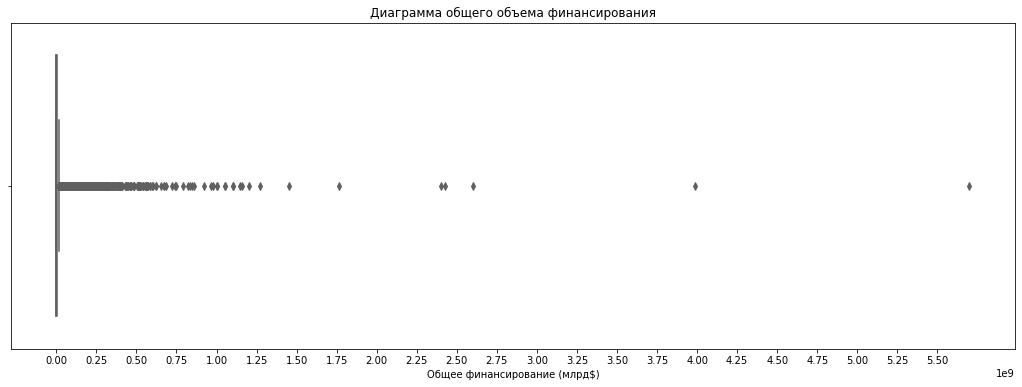

In [58]:
# Ящичковая диаграмма
plt.figure(figsize=(18, 6))
sns.boxplot(x=company['funding_total'], palette='Blues')
plt.xticks(np.arange(min(company['funding_total']), max(company['funding_total']) + 1, step=250000000))
plt.title('Диаграмма общего объема финансирования')
plt.xlabel('Общее финансирование (млрд$)')
plt.show()

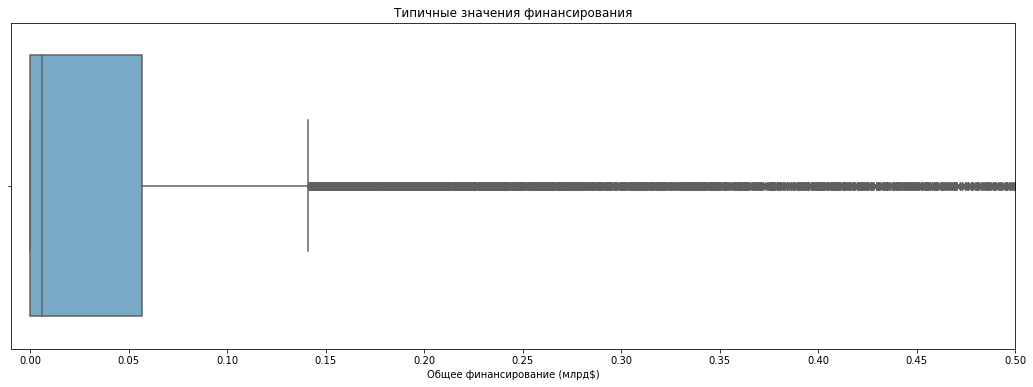

In [59]:
# приближаем диаграмму для более четкой наглядности типичных значений 
plt.figure(figsize=(18, 6))
sns.boxplot(x=company['funding_total'], palette='Blues')
plt.title('Типичные значения финансирования')
plt.xlabel('Общее финансирование (млрд$)')
plt.xlim(-1000000, 50000000)  # сужаем диапазон до очень близких значений
plt.xticks(ticks=np.arange(0, 50000001, 5000000), labels=[f'{val/1e9:.2f}' for val in np.arange(0, 500000001, 50000000)])  # деления по 5 млн долларов
plt.show()

___Судя по графику, можно сделать следующие выводы о распределении данных в столбце funding_total:____
- видно множество точек, находящихся далеко выше "усов". Это указывает на наличие большого количества выбросов — компаний с необычайно высокими суммами финансирования;
- видно, что большинство значений сконцентрированы в самом начале оси X (ближе к нулю), а правее значения резко уменьшаются, что говорит о сильно скошенном распределении. Большинство компаний имеют небольшие суммы финансирования, и лишь немногие — очень большие.


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [60]:
# Соединяем датафреймы company и acquisition для изучения цены продажи коспании и размера финансирования 
price_info = pd.merge(company, acquisition, left_on='company_id', right_on='acquired_company_id', how='left')
# смотрим получившийся датафрейм
price_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40890 non-null  Int64         
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  Int64         
 10  funding_rounds        40890 non-null  float64       
 11  funding_total         40890 non-null  float64       
 12  milestones            40890 non-null  float64       
 13  id              

In [61]:
# Фильтруем данные по заданным параметрам
low_cost_sales = price_info.query('price_amount.isin([0, 1]) & (funding_total > 0)')

# Смотрим количество таких компаний
len(low_cost_sales)

1618

__1618 компаний попадают под заданные условия__

In [62]:
# Вычисляем квартили
Q1 = low_cost_sales['funding_total'].quantile(0.25)
Q3 = low_cost_sales['funding_total'].quantile(0.75)
IQR = Q3 - Q1

# Границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Процентили границ
percentile_lower = low_cost_sales['funding_total'].lt(lower_bound).sum() / len(price_info) * 100
percentile_upper = low_cost_sales['funding_total'].gt(upper_bound).sum() / len(price_info) * 100

# Выводим результаты
print(f"Нижняя граница выбросов: {lower_bound:.2f} (процентиль: {percentile_lower:.2f}%)")
print(f"Верхняя граница выбросов: {upper_bound:.2f} (процентиль: {percentile_upper:.2f}%)")


Нижняя граница выбросов: -18250000.00 (процентиль: 0.00%)
Верхняя граница выбросов: 35750000.00 (процентиль: 0.36%)


__Нижняя граница выбросов соответствует 0 процентилю, а верхняя граница соответствует 0.36 процентилю)__


__Заменим значение нижней границы: Устанавливаем нижнюю границу на 0, так как отрицательных значений финансирования быть не может и визуализируем данные.__

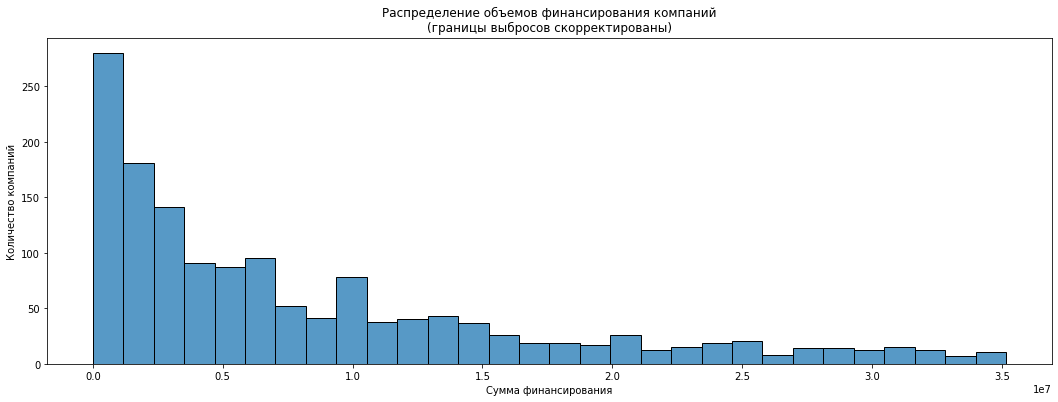

In [63]:
# Новые границы
lower_bound_new = 0
upper_bound = 35750000

# Фильтруем данные, оставляя только значения в границах
filtered_data = low_cost_sales[(low_cost_sales['funding_total'] >= lower_bound_new) & (low_cost_sales['funding_total'] <= upper_bound)]

# Строим гистограмму
plt.figure(figsize=(18, 6))
sns.histplot(filtered_data['funding_total'], bins=30, palette='Blues')
plt.title('Распределение объемов финансирования компаний\n(границы выбросов скорректированы)')
plt.xlabel('Сумма финансирования')
plt.ylabel('Количество компаний')
plt.show()

Большинство компаний, которые проданы за 0 и 1 доллар получили относительно небольшое финансирование: Наиболее высокая колонка находится в левой части графика, ближе к нулю. Это говорит о том, что основная масса компаний получила относительно малые суммы инвестиций.

Чем больше сумма финансирования, тем меньше компаний: Гистограмма убывает вправо — с ростом объема финансирования количество таких компаний резко сокращается.

Есть немного компаний с высоким уровнем финансирования: хотя их немного, такие компании всё же присутствуют в выборке.


Возможные причины "странных" сделок:
Компания может быть продана за символическую цену, из-за отсутствия интереса инвесторов (некоторые компании могут не привлекать инвесторов из-за отсутствия перспектив или недостаточной проработки бизнес-модели).

Компании могут быть проданы за символическую цену, если покупатель заинтересован в активах или технологиях стартапа и готов вкладывать деньги в его дальнейшее развитие, и, возможно, сделки оформляются таким образом для упрощения юридических процедур или для минимизации налоговых обязательств.


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [64]:
# Определяем выбросы с помощью метода IQR
Q1 = price_info['funding_total'].quantile(0.25)
Q3 = price_info['funding_total'].quantile(0.75)
IQR = Q3 - Q1

# Определение верхней и нижней границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные, оставляя только значения в границах
filtered_data = price_info[(price_info['funding_total'] >= lower_bound) & (price_info['funding_total'] <= upper_bound)]

# Выводим информацию о количестве строк до и после фильтрации
print(f"Количество строк до фильтрации: {len(price_info)}")
print(f"Количество строк после фильтрации: {len(filtered_data)}")

Количество строк до фильтрации: 40890
Количество строк после фильтрации: 35001


In [65]:
# Задаем опции для отображения чисел без экспоненты
pd.options.display.float_format = '{:,.0f}'.format

# Копируем нужные столбцы из отфильтрованных данных
df_category_cost = filtered_data[['category_code', 'funding_total']].copy()

# Группируем по категории и считаем MAX и STD
grouped_std_and_max = df_category_cost.groupby('category_code').agg(
    MAX=('funding_total', np.max),
    STD=('funding_total', np.std)
)

# Сортируем по стандартной девиации (STD) в порядке убывания
grouped_std = grouped_std_and_max[['STD']].sort_values(by='STD', ascending=False)

# Сортируем по максимальному значению (MAX) в порядке убывания
grouped_max = grouped_std_and_max[['MAX']].sort_values(by='MAX', ascending=False)

# Выводим первые 5 записей обеих таблиц
print("Топ-5 категорий по максимальному значению финансирования:")
print(grouped_max.head())

print("\nТоп-5 категорий по стандартному отклонению:")
print(grouped_std.head())

Топ-5 категорий по максимальному значению финансирования:
                     MAX
category_code           
automotive    14,069,800
hardware      14,069,200
software      14,060,000
enterprise    14,050,000
mobile        14,037,100

Топ-5 категорий по стандартному отклонению:
                    STD
category_code          
semiconductor 4,401,281
cleantech     3,976,945
security      3,799,439
medical       3,733,473
biotech       3,670,253


__Топ-5 — это оптимальный компромисс между достаточным объемом информации и легкостью восприятия. Ограничиваясь пятью позициями, мы сосредотачиваемся на самых ярких примерах, что экономит время и усилия на анализ второстепенных данных.__
    
__Вывод по полученным данным:__

Топ-5 категорий по максимальному значению финансирования:
- Automotive: Максимальная сумма финансирования в этой категории составляет 14,069,800 долларов. Это может указывать на высокую привлекательность автомобильной отрасли для инвесторов.
- Hardware: Вторая по величине сумма финансирования — 14,069,200 долларов. Это может быть связано с развитием технологий и оборудования.
- Software: Третья по величине сумма финансирования — 14,060,000 долларов. Программное обеспечение остается одной из самых привлекательных отраслей для инвестиций.
- Enterprise: Четвертая по величине сумма финансирования — 14,050,000 долларов. Это может быть связано с ростом корпоративных решений и технологий.
- Mobile: Пятая по величине сумма финансирования — 14,037,100 долларов. Мобильные технологии продолжают привлекать внимание инвесторов.

Топ-5 категорий по стандартному отклонению:
- Semiconductor: Наибольшее стандартное отклонение — 4,401,281 долларов. Это указывает на высокую вариативность сумм финансирования в этой отрасли.
- Cleantech: Второе по величине стандартное отклонение — 3,976,945 долларов. Это может быть связано с рисками и неопределенностью в области экологически чистых технологий.
- Security: Третье по величине стандартное отклонение — 3,799,439 долларов. Это может быть связано с колебаниями в области кибербезопасности.
- Medical: Четвертое по величине стандартное отклонение — 3,733,473 долларов. Медицинская отрасль также демонстрирует высокую вариативность сумм финансирования.
- Biotech: Пятое по величине стандартное отклонение — 3,670,253 долларов. Биотехнологии остаются одной из самых рискованных, но и потенциально прибыльных отраслей.
    
    
__Мы выбрали эти два критерия, чтобы выявить как наиболее дорогостоящие, так и наиболее рискованные категории, что формирует полную картину инвестиционной привлекательности.__


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [66]:
# выводим данные без округлений
pd.set_option('display.float_format', '{:.2f}'.format)

# Группируем данные по статусу стартапа и вычисляем среднее количество раундов
avg_rounds_by_status = company.groupby('status')['funding_rounds'].mean()
avg_rounds_by_status

status
acquired    0.52
closed      1.38
ipo         1.93
operating   1.52
Name: funding_rounds, dtype: float64

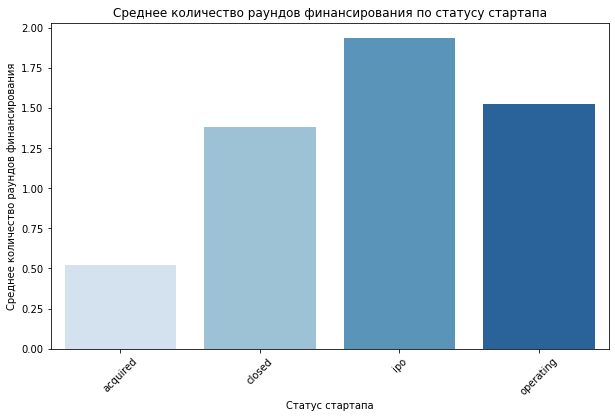

In [67]:
# Построим график
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rounds_by_status.index, y=avg_rounds_by_status.values, palette='Blues')
plt.title('Среднее количество раундов финансирования по статусу стартапа')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов финансирования')
plt.xticks(rotation=45)
plt.show()

__Стартапы с IPO__ проходят наибольшее количество раундов финансирования (в среднем около 2). Это логично, так как такие компании, как правило, проходят длинный путь развития перед выходом на публичный рынок.

__Операционные (operating) стартапы__ также имеют достаточно высокое среднее число раундов — чуть меньше, чем IPO-компании. Это говорит о том, что действующие компании активно привлекают инвестиции на разных стадиях.

__Закрытые (closed) стартапы__ проходят меньше раундов — примерно 1.4. Это может свидетельствовать о том, что они не смогли привлечь достаточно инвестиций и в итоге прекратили деятельность.

__Приобретённые (acquired) стартапы__ имеют наименьшее среднее количество раундов — менее 0.5. Видимо, они быстро были куплены другими компаниями, не успев пройти много инвестиционных этапов.


status
acquired    1.98
closed      1.45
ipo         2.55
operating   1.72
Name: funding_rounds, dtype: float64


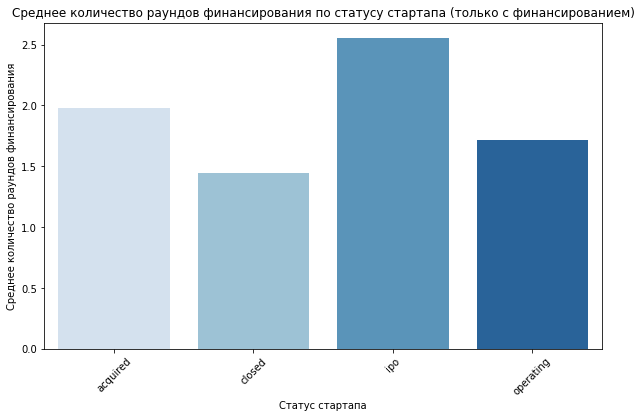

In [68]:
# Устанавливаем опцию для отображения чисел без округления
pd.set_option('display.float_format', '{:.2f}'.format)

# Фильтруем данные, оставляя только компании с ненулевым финансированием
funded_companies = company[company['funding_total'] > 0]

# Группируем данные по статусу стартапа и вычисляем среднее количество раундов
avg_rounds_by_status = funded_companies.groupby('status')['funding_rounds'].mean()

# Выводим результаты
print(avg_rounds_by_status)

# Построим график
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rounds_by_status.index, y=avg_rounds_by_status.values, palette='Blues')
plt.title('Среднее количество раундов финансирования по статусу стартапа (только с финансированием)')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов финансирования')
plt.xticks(rotation=45)
plt.show()

__Отфильтрованные данные дают более точную картину, так как исключают компании с нулевым финансированием. Это позволяет лучше понять, сколько раундов финансирования проходят компании, которые действительно привлекли инвестиции.__

__Изменилась и градация стартапов по статусу:__

- IPO:Среднее количество раундов — 2.55. Это указывает на то, что компании, вышедшие на IPO, проходят значительное количество раундов финансирования, что логично, так как они обычно проходят долгий путь развития перед выходом на публичный рынок.

- Operating:Среднее количество раундов — 1.72. Это говорит о том, что действующие компании активно привлекают инвестиции на разных стадиях.

- Acquired:Среднее количество раундов — 1.98. Это может указывать на то, что приобретённые компании проходят несколько раундов финансирования перед продажей.

- Closed:Среднее количество раундов — 1.45. Это может свидетельствовать о том, что закрытые компании не смогли привлечь достаточно инвестиций и в итоге прекратили деятельность.



## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.


__1. Подготовка и предобработка данных__

Данные были подготовленны к работе и хоть в них довольно много пропусков, информации достаточно для проведения объективкого исследования.

__2. Анализ пропущенных значений__
- Большинство датасетов содержат значительное количество пропусков:
    - в некоторых столбцах (например, term_code, pre_money_valuation, participants) — более 75%пропусков;
    - в других — незначительное количество (0.1–1%), что допустимо.
- Принято решение не заполнять пропуски, так как это может исказить данные. Вместо этого — использовать фильтрацию и анализ только по полным строкам, где это возможно.

__3. Исследование финансирования стартапов__
- Проведена агрегация по годам:
     - максимальная медиана средств, собранных в одном раунде, наблюдалась в 2005 году это 5,500,000 долларов;
     - в 2013 году наблюдался рост по сравнению с 2012:
        - количество раундов увеличилось на 11%;
        - средний размер средств — на 20% (с 1,000,000 долларов до 1,200,000 долларов).
- Типичное значение размера финансирования по компании — $600,000 (по медиане), что предпочтительнее, чем использование среднего из-за сильных выбросов.
- График распределения funding_total показал:
    - множество выбросов (очень крупные инвестиции у отдельных компаний);
    - сильный скос распределения в сторону малых значений.

__4. Образование и сотрудники__
- Использованы датасеты people.csv и education.csv:
    - Компании разделены по размеру:
        - маленькие: 26% без информации об образовании;
        - средние: 38%;
        - крупные: 50%.
    - Видна прямая связь: чем больше компания, тем выше доля сотрудников с неполной информацией об образовании.
- Таблица degrees.csv была присоединена, но не критична для анализа полноты образования — полезна для последующих исследований.

__5. Объединение данных__
- Для объединения подходит только столбец company_id.
- network_username использовать нельзя, так как в разных датасетах он означает разные сущности: компанию, человека или фонд.
- Отобраны интересующие заказчика компании — те, кто получал инвестиции или был приобретён (~40,747 компаний).

__6. Анализ стоимости стартапов__
- Проданные за символическую цену (0 или 1 доллар) компании, как правило:
    - получали мало инвестиций;
    - представлены в левом сегменте распределения (низкие значения финансирования).
- Гистограмма подтверждает: чем выше сумма инвестиций, тем меньше таких компаний.
- Топ-5 категорий компаний по средней цене покупки и коэффициенту вариации:
    - такой подход позволяет сосредоточиться на наиболее дорогих и рискованных отраслях.

__7. Раунды финансирования по статусу компании__
- IPO:Среднее количество раундов — 2.55. Это указывает на то, что компании, вышедшие на IPO, проходят значительное количество раундов финансирования, что логично, так как они обычно проходят долгий путь развития перед выходом на публичный рынок.

- Operating:Среднее количество раундов — 1.72. Это говорит о том, что действующие компании активно привлекают инвестиции на разных стадиях.

- Acquired:Среднее количество раундов — 1.98. Это может указывать на то, что приобретённые компании проходят несколько раундов финансирования перед продажей.

- Closed:Среднее количество раундов — 1.45. Это может свидетельствовать о том, что закрытые компании не смогли привлечь достаточно инвестиций и в итоге прекратили деятельность.

__Рекомендации:__

__1. Инвестируйте в компании с сильной финансовой динамикой:__
- ориентируйтесь на стартапы, у которых уже были 2 и более раундов финансирования, особенно если они находятся в статусе operating или IPO — это повышает вероятность успеха.
- избегайте компаний с нулевыми инвестициями или только одним микрораундом — они чаще попадают в «закрытые» или «символически проданные».

__2. Оценивайте сумму уже привлечённых инвестиций:__
- стартапы с общим финансированием выше медианного ($600,000) — надёжнее, особенно если сумма не аномально высока (без выбросов).
- большое количество малых инвестиций — тоже хороший признак: рынок в них верит.

__3. Изучайте отраслевую принадлежность:__
- сфокусируйтесь на 5 отраслей с высокой средней ценой приобретения и высоким риском (по коэффициенту вариации) — именно там чаще всего происходят прибыльные сделки.

__4. Используйте данные о статусе компании:__
- «Closed» чаще означает провал, а «Acquired» — быструю перепродажу (иногда выгодную);
- «Operating» и «IPO» — долгосрочные кандидаты для роста и масштабирования.

__5. Фильтруйте по полноте информации:__
- Работайте только с компаниями, по которым есть досаточно информации о финансировании, дате основания, инвестиционных раундах — иначе высок риск ошибочных решений.